In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#import lib

In [0]:
import pandas as pd
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/covid_19_data3.csv')
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
#filter indonesia
data = data[data['Country']=='Indonesia']

#Exploration

In [0]:
data = data.groupby(["Date"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=data.sort_values('Date',ascending=False)
data['DateIndex'] = data.index
data.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered,DateIndex
count,35.000000,35.000000,35.000000,35.000000
mean,622.542857,53.885714,35.285714,17.000000
std,715.577979,65.409467,46.840513,10.246951
min,2.000000,0.000000,0.000000,0.000000
25%,30.500000,0.500000,2.000000,8.500000
50%,311.000000,25.000000,11.000000,17.000000
75%,1100.500000,94.500000,52.500000,25.500000
max,2273.000000,198.000000,164.000000,34.000000


In [0]:
data

,Date,Confirmed,Deaths,Recovered,DateIndex
0,03/02/2020,2.0,0.0,0.0,0
1,03/03/2020,2.0,0.0,0.0,1
2,03/04/2020,2.0,0.0,0.0,2
3,03/05/2020,2.0,0.0,0.0,3
4,03/06/2020,4.0,0.0,0.0,4
5,03/07/2020,4.0,0.0,0.0,5
6,03/08/2020,6.0,0.0,0.0,6
7,03/09/2020,19.0,0.0,0.0,7
8,03/10/2020,27.0,0.0,2.0,8
9,03/11/2020,34.0,1.0,2.0,9


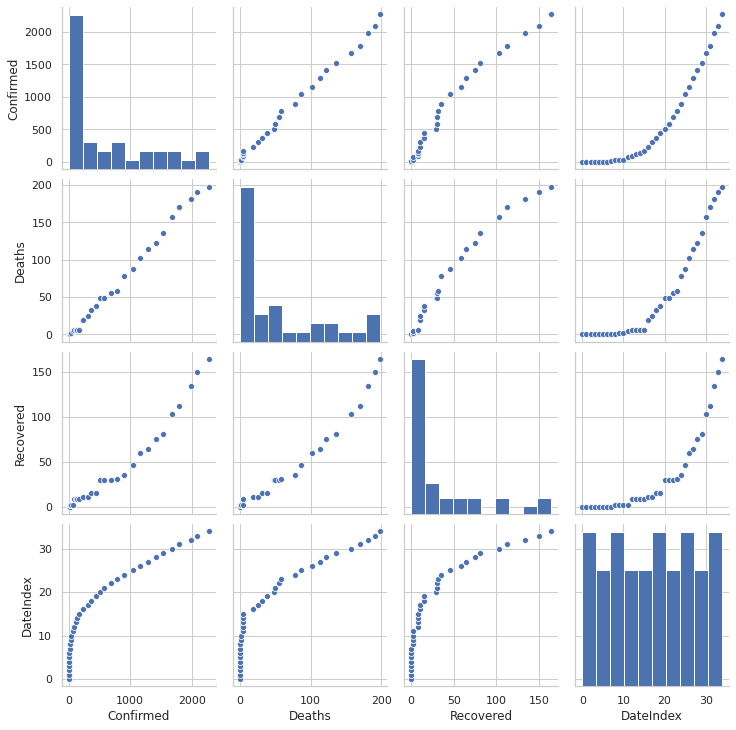

In [0]:
sn.pairplot(data)

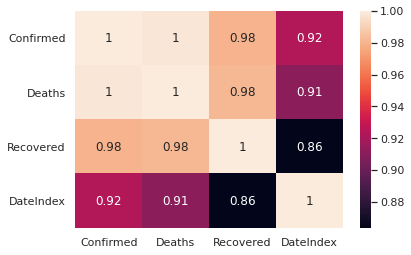

In [0]:
sn.heatmap(data.corr(),annot=True)

#Model Prediction

In [0]:
x = pd.DataFrame(data.Confirmed)
y = pd.DataFrame(data.Deaths)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#error training
y_train_predicted = model.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))

result_train=pd.DataFrame(y_train_predicted)
result_train['Real Value']=y_train.iloc[:,:].values
result_train['Predicted Value']=pd.DataFrame(y_train_predicted)
result_train=result_train[['Real Value','Predicted Value']]
result_train.loc[(result_train['Predicted Value']<1), ['Predicted Value']] = [0]
print(result_train)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.155343019693875
    Real Value  Predicted Value
0         38.0        37.970922
1        102.0       102.197174
2         78.0        78.328695
3          0.0         0.000000
4          0.0         0.000000
5        136.0       136.177872
6        170.0       160.046352
7          1.0         0.000000
8        114.0       114.040313
9          0.0         0.000000
10         0.0         0.000000
11        19.0        17.655384
12       191.0       187.558874
13         5.0         7.634267
14         0.0         0.000000
15       198.0       204.048167
16         0.0         0.000000
17         5.0         9.182985
18        48.0        43.801390
19         4.0         3.261415
20         5.0         5.721144
21        49.0        49.722960
22        55.0        59.470774
23         1.0         0.000000
24        87.0        92.267158
25         5.0        12.644825
26     

In [0]:
#error testing
y_test_predict = model.predict(x_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("\n\n The model performance for the testing set")
print("-------------------------------------------")
print("RMSE of testing set is {} \n".format(rmse_test))
result=pd.DataFrame(y_test_predict)
result['Real Value']=y_test.iloc[:,:].values
result['Predicted Value']=pd.DataFrame(y_test_predict)
result=result[['Real Value','Predicted Value']]
result.loc[(result['Predicted Value']<1), ['Predicted Value']] = [0]

print(result)



 The model performance for the testing set
-------------------------------------------
RMSE of testing set is 2.165122319933864 

   Real Value  Predicted Value
0        25.0        25.307874
1        32.0        30.591736
2       181.0       177.902161
3         0.0         0.000000


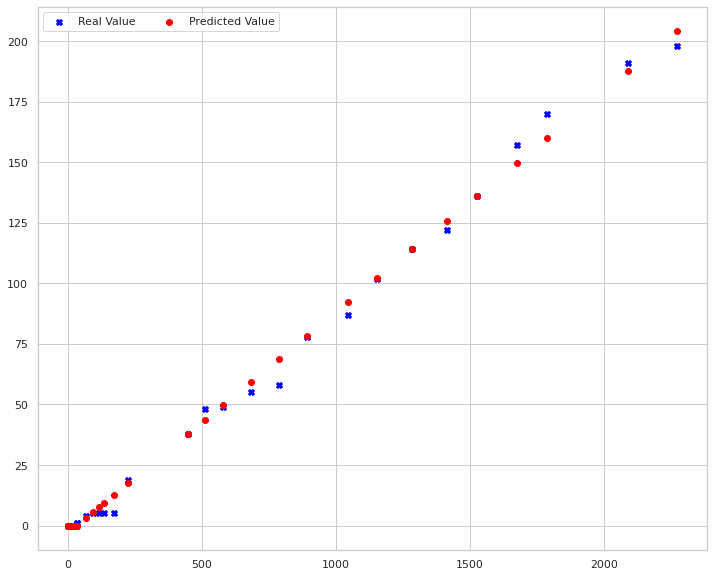

In [0]:
x=x_train
y=result_train['Real Value']
y1=result_train['Predicted Value']
sn.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12,10 ))
plt.scatter(x,y,color='blue',marker='X', label='Real Value')
plt.scatter(x,y1,color='red' ,marker='o',label="Predicted Value")
ax.legend(ncol=2, loc='upper left', frameon=True)
plt.show()

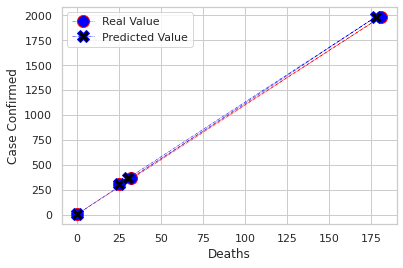

In [0]:
x1 = result['Real Value']
y1 = x_test
plt.plot(x1, y1, color='red',label = "Real Value", linestyle='dashdot', linewidth = 0.5,
         marker='o', markerfacecolor='blue', markersize=12)
x2 = result['Predicted Value']
y2 = x_test
plt.plot(x2, y2, color='blue',label = "Predicted Value", linestyle='dashdot', linewidth = 0.5,
         marker='X', markerfacecolor='black', markersize=12)
plt.xlabel('Deaths')
plt.ylabel('Case Confirmed')
plt.legend()
plt.show()

#Confirms and Deaths

In [0]:
x = pd.DataFrame(data.index)
y = pd.DataFrame(data.Confirmed)
x_train_con, x_test_con, y_train_con, y_test_con = train_test_split(x, y, test_size=0.1)

In [0]:
# model_confirm = LinearRegression()
# model_confirm.fit(x_train_con, y_train_con)
# confirm_pred = model_confirm.predict(x_train_con)
# rmse_train = np.sqrt(mean_squared_error(y_train_con, confirm_pred))
# print("The model performance for the training set")
# print("-------------------------------------------")
# print("RMSE of training set is {}".format(rmse_train))

# result_train=pd.DataFrame(confirm_pred)
# result_train['Real Value']=y_train_con.iloc[:,:].values
# result_train['Predicted Value']=pd.DataFrame(confirm_pred)
# result_train=result_train[['Real Value','Predicted Value']]
# result_train.loc[(result_train['Predicted Value']<1), ['Predicted Value']] = [0]
# print(result_train)

In [0]:
poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x_train_con)
lin_reg2=LinearRegression()
r = lin_reg2.fit(x_poly,y_train_con)

In [0]:
#testing
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test_con))
#training
y_pred_train=lin_reg2.predict(poly_reg.fit_transform(x_train_con))
#metric
rmse_train = np.sqrt(mean_squared_error(y_train_con, y_pred_train))
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))

The model performance for the training set
-------------------------------------------
RMSE of training set is 12.876022182667844


In [0]:
result_train_con=pd.DataFrame(y_pred_train)
result_train_con['Real Value']=y_train_con.iloc[:,:].values
result_train_con['Predicted Value']=pd.DataFrame(y_pred_train)
result_train_con=result_train_con[['Real Value','Predicted Value']]
print(result_train_con)

    Real Value  Predicted Value
0        369.0       364.366499
1          4.0         7.243325
2        117.0       110.492991
3         19.0        10.003938
4       1790.0      1819.922580
5       1155.0      1144.942575
6       1986.0      1964.895261
7         34.0        37.836447
8        893.0       909.519013
9       1528.0      1537.942903
10         2.0        -4.506335
11       450.0       437.097959
12        96.0        80.346447
13        34.0        24.416380
14       686.0       699.469710
15      1285.0      1271.138879
16      2273.0      2258.960761
17         2.0         2.921577
18       311.0       299.087732
19         2.0         7.496720
20      1677.0      1677.364815
21       172.0       190.628284
22       227.0       241.214098
23      1414.0      1402.327784
24       790.0       801.145667
25         4.0         6.876143
26       134.0       147.141708
27         2.0         6.473942
28      1046.0      1024.250701
29      2092.0      2111.513445
30      

In [0]:
rmse_test = np.sqrt(mean_squared_error(y_test_con, y_pred))
print("The model performance for the testing set")
print("-------------------------------------------")
print("RMSE of testing set is {} \n".format(rmse_test))
result_test_con=pd.DataFrame(y_pred)
result_test_con['Real Value']=y_test_con.iloc[:,:].values
result_test_con['Predicted Value']=pd.DataFrame(y_pred)
result_test_con=result_test_con[['Real Value','Predicted Value']]
print(result_test_con)

The model performance for the testing set
-------------------------------------------
RMSE of testing set is 15.582115291285131 

   Real Value  Predicted Value
0        27.0        15.382225
1        69.0        56.290556
2       579.0       604.769548
3       514.0       517.261438


#prediction positive cases for 30 & 31 march

In [0]:
new_data=pd.DataFrame([35,36])#30 & 31
new_result=lin_reg2.predict(poly_reg.fit_transform(new_data))
new_result = pd.DataFrame(new_result)
new_result

,0
0,2406.375398
1,2552.851629


#prediction deaths for 30 & 31 march

In [0]:
new_data=pd.DataFrame([26,27,28,29,30,31,32,33,34,35])
new_result=lin_reg2.predict(poly_reg.fit_transform(new_data))
confirmNew=pd.DataFrame(new_result)
deathsPredict = model.predict(confirmNew)
deathsPredict = pd.DataFrame(deathsPredict)


In [0]:
confirmNew

,0
0,1144.942575
1,1271.138879
2,1402.327784
3,1537.942903
4,1677.364815
5,1819.922580
6,1964.895261
7,2111.513445
8,2258.960761
9,2406.375398


In [0]:
deathsPredict

,0
0,101.280932
1,112.777550
2,124.728999
3,137.083682
4,149.785167
5,162.772331
6,175.979497
7,189.336570
8,202.769178
9,216.198809


In [0]:
nd=pd.DataFrame([26,27,28,29,30,31,32,33,34,35,36])
nr=lin_reg2.predict(poly_reg.fit_transform(nd))
cn=pd.DataFrame(nr)
dp = model.predict(cn)
dp = pd.DataFrame(dp)

In [0]:
dp

,0
0,101.280932
1,112.777550
2,124.728999
3,137.083682
4,149.785167
5,162.772331
6,175.979497
7,189.336570
8,202.769178
9,216.198809


In [0]:
dc = data.iloc[26:35,1:2]
dd = data.iloc[26:35,2:3]
# 
dd
rmse_death = np.sqrt(mean_squared_error(dd, deathsPredict.iloc[0:9,:]))
rmse_death

4.290089024196129

In [0]:
rmse_confirm = np.sqrt(mean_squared_error(dc, confirmNew.iloc[0:9,:]))
rmse_confirm

16.489603021527422

In [0]:
deathsPredict.iloc[0:9,:]

,0
0,101.280932
1,112.777550
2,124.728999
3,137.083682
4,149.785167
5,162.772331
6,175.979497
7,189.336570
8,202.769178
